In [1]:
# !pip uninstall -y pandas-profiling
# !pip install ydata-profiling


In [3]:
# !pip install dtale

In [4]:
# pip install --upgrade dtale


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('diabetic_data.csv', keep_default_na=False)


## Data Discovery

In [6]:
data.shape

(101766, 50)

In [4]:
data.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738,28236,36900,40926,42570,62256,73578,77076,84222,89682,148530
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939,89869032,77391171,85504905,77586282,49726791,86328819,92519352,108662661,107389323,69422211
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,AfricanAmerican,AfricanAmerican,Caucasian,Caucasian,AfricanAmerican,AfricanAmerican,AfricanAmerican,Caucasian,AfricanAmerican,?
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female,Female,Male,Female,Male,Female,Male,Male,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100),[40-50),[60-70),[40-50),[80-90),[60-70),[60-70),[50-60),[50-60),[70-80),[70-80)
weight,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
admission_type_id,6,1,1,1,1,2,3,1,2,3,1,2,1,1,3,1,1,1,1,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3,1,1,3,6,1,3,1,1,1,6
admission_source_id,1,7,7,7,7,2,2,7,4,4,7,4,7,7,2,7,7,7,7,2
time_in_hospital,1,3,2,2,1,3,4,5,13,12,9,7,7,10,1,12,4,3,5,6


In [20]:
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [21]:
data.describe(include="object")

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,6,3,10,10,18,73,717,749,790,4,...,1,4,4,2,2,2,2,2,2,3
top,Caucasian,Female,[70-80),?,?,?,428,276,250,None,...,No,No,No,No,No,No,No,No,Yes,NO
freq,76099,54708,26068,98569,40256,49949,6862,6752,11555,96420,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [23]:
from ydata_profiling import ProfileReport

profile = ProfileReport(data)
profile.to_file("dataset_summary.html")


2025-03-20 13:00:31,650 - INFO     - Pandas backend loaded 2.1.4
2025-03-20 13:00:31,661 - INFO     - Numpy backend loaded 1.26.4
2025-03-20 13:00:31,663 - INFO     - Pyspark backend NOT loaded
2025-03-20 13:00:31,664 - INFO     - Python backend loaded


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|███████████████████████████████████████████| 50/50 [00:04<00:00, 11.62it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
# pip install dash==2.11.1


In [9]:
import dtale

dtale.show(data)  # Opens an interactive dashboard in your browser


2025-03-20 12:15:44,824 - ERROR    - Exception on /health [GET]
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/flask/app.py", line 2529, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/flask/app.py", line 1825, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/flask/app.py", line 1821, in full_dispatch_request
    rv = self.preprocess_request()
         ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/flask/app.py", line 2313, in preprocess_request
    rv = self.ensure_sync(before_func)()
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/dash/dash.py", line 1300, in _setup_server
    self._generate_scripts_html()
  File "/opt/anaconda3/lib/python3.11/site-packages/dash/d

In [7]:
df = data.copy()

## Target Variable

In [8]:
df['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

In [9]:
# Convert to binary: 1 if '<30', otherwise 0
df["readmitted"] = np.where(df["readmitted"] == "<30", 1, 0)

In [10]:
df['readmitted'].unique()

array([0, 1])

## Removing duplicates

In [215]:
# The dataset contains multiple inpatients visits for some patients - 
# so the observation could not be considered as statistically independent.
# So, we will only keep one encounter per patient.

In [11]:
df = df.sort_values(by=["patient_nbr", "encounter_id"])  # Sort by patient and encounter order
df = df.drop_duplicates(subset="patient_nbr", keep="first")  # Keep only the first encounter per patient


In [12]:
df.drop(columns=["patient_nbr"], inplace=True)

In [13]:
df.shape

(71518, 49)

In [14]:
# We don't have null values but gender has "Unknown/Invalid" value, and many columns have '?' in it, 
# so we will further investigate it. 

In [15]:
# Define invalid values to check
invalid_values = ["?", "Unknown/Invalid"]

# Count occurrences of each invalid value in every column
invalid_counts = {value: (df == value).sum() for value in invalid_values}

# Count NaN (null) values
invalid_counts["NaN"] = df.isnull().sum()

# Create a DataFrame to display the counts
invalid_counts_df = pd.DataFrame(invalid_counts)

# Calculate total invalid values per column
invalid_counts_df["Total Invalid"] = invalid_counts_df.sum(axis=1)

# Calculate the percentage of invalid values
invalid_counts_df["Invalid %"] = (invalid_counts_df["Total Invalid"] / len(df)) * 100


# Display the result
print(invalid_counts_df)

                              ?  Unknown/Invalid  NaN  Total Invalid  \
encounter_id                  0                0    0              0   
race                       1948                0    0           1948   
gender                        0                3    0              3   
age                           0                0    0              0   
weight                    68665                0    0          68665   
admission_type_id             0                0    0              0   
discharge_disposition_id      0                0    0              0   
admission_source_id           0                0    0              0   
time_in_hospital              0                0    0              0   
payer_code                31043                0    0          31043   
medical_specialty         34477                0    0          34477   
num_lab_procedures            0                0    0              0   
num_procedures                0                0    0           

## Deal with missing values - Imputing or Binning

Variable 'weight' contains approximately 96% of missing data (?) so there is no significance in filling the missing values, so we will drop the variable.

In [16]:
df = df.drop(['weight'], axis = 1)

In [17]:
df.shape

(71518, 48)

In [18]:
df1=df.copy()

In [19]:
# Replace "?" with NaN
df1.replace(["?", "Unknown/Invalid"], np.nan, inplace=True)

# Check missing values
print(df1.isnull().sum())  # Show missing values count per column

encounter_id                    0
race                         1948
gender                          3
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  31043
medical_specialty           34477
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         11
diag_2                        294
diag_3                       1225
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide     

Variable 'diag1', 'diag2', and 'diag3' have less number of missing values (?), and they represent diagnosis which can be an important predictor for readmission, so we will remove the observations with missing values, but we will only keep 'diag1' as it is the primary diagnosis and remove 'diag2', and 'diag3'. Also 'gender' has 3 observations with Unknown/Invalid value (outlier), so we will do the same for it too.

In [20]:
df1.dropna(subset=["diag_1", "gender"], inplace=True)

In [21]:
df1 = df1.drop(['diag_2', 'diag_3'], axis = 1)

In [22]:
df1.shape

(71504, 46)

Variable 'payer_code' and 'medical_specialty' contains more than 40% of missing data (?), or unknowns, so instead of removing them, we will bin them into another category called "Unknown". We will do the same for variable 'race'.

In [23]:
df1['medical_specialty']=df1['medical_specialty'].fillna('UnKnown')
df1['payer_code']=df1['payer_code'].fillna('UnKnown')
df1['race']=df1['race'].fillna('UnKnown')

In [24]:
# Check missing values
print(df1.isnull().sum())  # Show missing values count per column

encounter_id                0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazo

In [22]:
# Check for unique values

unique_counts = df1.nunique()
print(unique_counts)


encounter_id                71504
race                            6
gender                          2
age                            10
admission_type_id               8
discharge_disposition_id       26
admission_source_id            17
time_in_hospital               14
payer_code                     18
medical_specialty              71
num_lab_procedures            116
num_procedures                  7
num_medications                75
number_outpatient              33
number_emergency               18
number_inpatient               13
diag_1                        696
number_diagnoses               16
max_glu_serum                   4
A1Cresult                       4
metformin                       4
repaglinide                     4
nateglinide                     4
chlorpropamide                  4
glimepiride                     4
acetohexamide                   2
glipizide                       4
glyburide                       4
tolbutamide                     2
pioglitazone  

Variable 'examide', 'citoglipton', 'glimepiride-pioglitazone'  has same values in all records, so it cannot provide any discriminatory information for predicting readmission, so we will drop them.

In [25]:
df1 = df1.drop(['citoglipton', 'examide', 'glimepiride-pioglitazone'], axis = 1)

In [26]:
df1.shape

(71504, 43)

In [104]:
mapping = pd.read_csv('id_mapping.csv', keep_default_na=False)

In [107]:
mapping

,ID mappings for the diabetes dataset,? - always means a missing value
0,admission_type_id,description
1,1,Emergency
2,2,Urgent
3,3,Elective
4,4,Newborn
...,...,...
63,22,Transfer from hospital inpt/same fac reslt in ...
64,23,Born inside this hospital
65,24,Born outside this hospital
66,25,Transfer from Ambulatory Surgery Center


In [27]:
df2 = df1.copy()

In [28]:
df2.shape

(71504, 43)

## Collapsing Categorical Variables

## Visualize the distribution

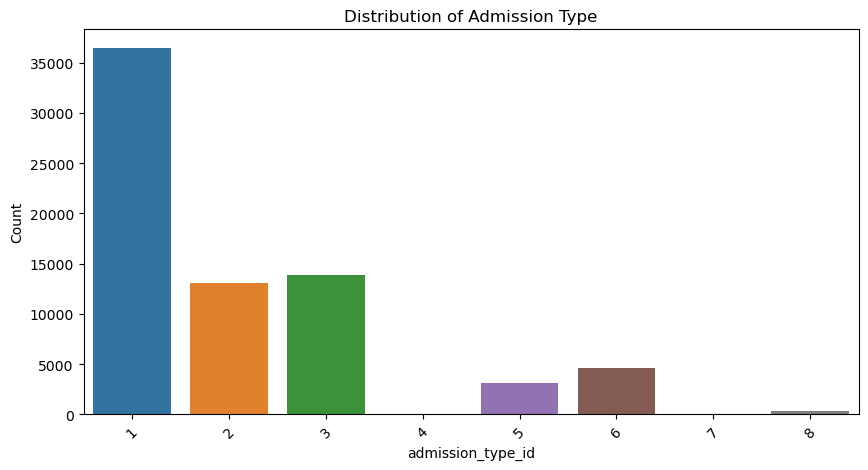

In [294]:
import seaborn as sns
import matplotlib.pyplot as plt

variable = "admission_type_id"  # Replace with the column name

plt.figure(figsize=(10, 5))
sns.countplot(x=df2[variable])
plt.title(f"Distribution of Admission Type")
plt.xlabel(variable)
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate labels for better readability if needed
plt.show()


In [29]:
# "admission_type_id" has 8 unique value - collapse them

# Collapse values
df2['admission_type_id'] = df2['admission_type_id'].replace({
    2: 1,
    7: 1,
    6: 5,
    8: 5
})

# Step 2: Map collapsed values to categories
admission_type_map = {
    1: "Emergency",
    3: "Elective",
    4: "Newborn",
    5: "Others"
}

df2['admission_type_id'] = df2['admission_type_id'].map(admission_type_map)


In [30]:
df2['admission_type_id'].unique()

array(['Emergency', 'Elective', 'Others', 'Newborn'], dtype=object)

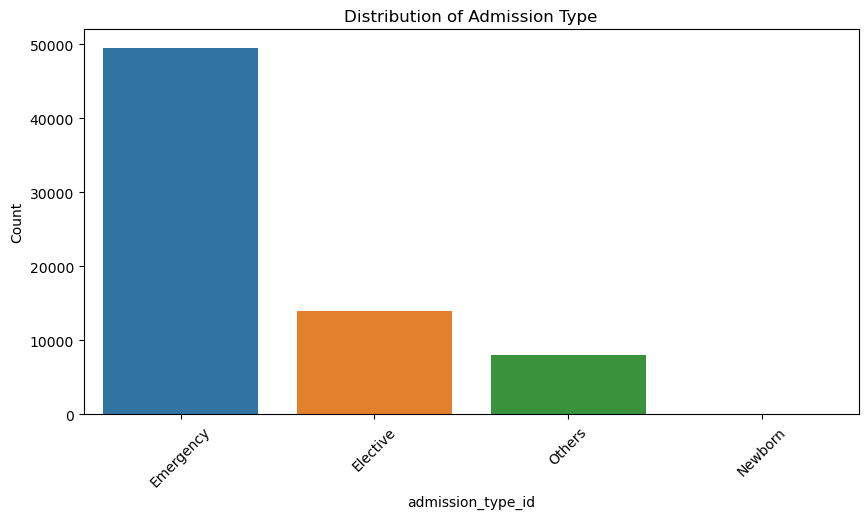

In [353]:
import seaborn as sns
import matplotlib.pyplot as plt

variable = "admission_type_id"  # Replace with the column name

plt.figure(figsize=(10, 5))
sns.countplot(x=df2[variable])
plt.title(f"Distribution of Admission Type")
plt.xlabel(variable)
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate labels for better readability if needed
plt.show()


In [29]:
df2['discharge_disposition_id'].unique()

array([ 1,  3,  6,  5,  2, 25, 18, 11, 22, 13, 14,  7,  8,  4, 23, 15, 12,
       17, 16, 28, 24, 27,  9, 10, 19, 20])

"discharge_disposition_id" tells us where the patient went after the hospitalization 11,13,14,19,20,21 are related to death or hospice, those patients cannot be readmitted, so we will remove them.

In [31]:
values_to_remove = [11, 13, 14, 19, 20, 21]

# Drop rows where the column contains any of these values
df2 = df2[~df2['discharge_disposition_id'].isin(values_to_remove)]
# Recategorizing discharge_disposition_id

# Define the mapping
home_category = [1, 6, 8]  # IDs for 'Discharged to Home'

# Assign numerical values using np.where()
df2["discharge_disposition_id"] = np.where(
    df2["discharge_disposition_id"].isin(home_category), 1, 2  # 1 for Home, 2 for Others
)

# Map the discharge_disposition_id to labels
df2["discharge_disposition_id"] = df2["discharge_disposition_id"].map({1: "Home", 2: "Others"})


In [32]:
df2['discharge_disposition_id'].unique()

array(['Home', 'Others'], dtype=object)

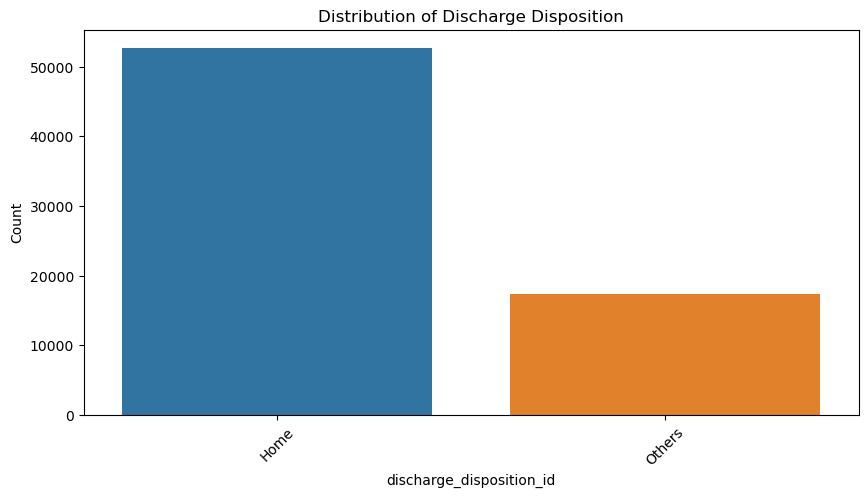

In [357]:
import seaborn as sns
import matplotlib.pyplot as plt

variable = "discharge_disposition_id"  # Replace with the column name

plt.figure(figsize=(10, 5))
sns.countplot(x=df2[variable])
plt.title(f"Distribution of Discharge Disposition")
plt.xlabel(variable)
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate labels for better readability if needed
plt.show()


In [32]:
df2['admission_source_id'].unique()

array([ 1,  7,  4,  6,  2,  5, 17,  3, 20,  9,  8, 14, 10, 13, 25, 22, 11])

In [33]:
# Recategorizing admission_source_id

# Define the mapping
refferal = [1, 2]  # IDs for 'Admitted because of physician/clinic referral'
emergency = [7]   # IDs for 'Admitted from emergency room'

# Assign numerical values using np.select()
df2["admission_source_id"] = np.select(
    [
        df2["admission_source_id"].isin(emergency),   # Condition for 'Admitted from emergency room'
        df2["admission_source_id"].isin(refferal)   # Condition for 'Admitted because of physician/clinic referral'
    ],
    [
        1,
        2
    ],
    default = 3   # Assign "Others" to admission_source_id
)

# Map the discharge_disposition_id to labels
df2["admission_source_id"] = df2["admission_source_id"].map({1: "Emergency Room", 2: "Physician/Clinic Referral", 3: "Others"})


In [34]:
df2['admission_source_id'].unique()

array(['Physician/Clinic Referral', 'Emergency Room', 'Others'],
      dtype=object)

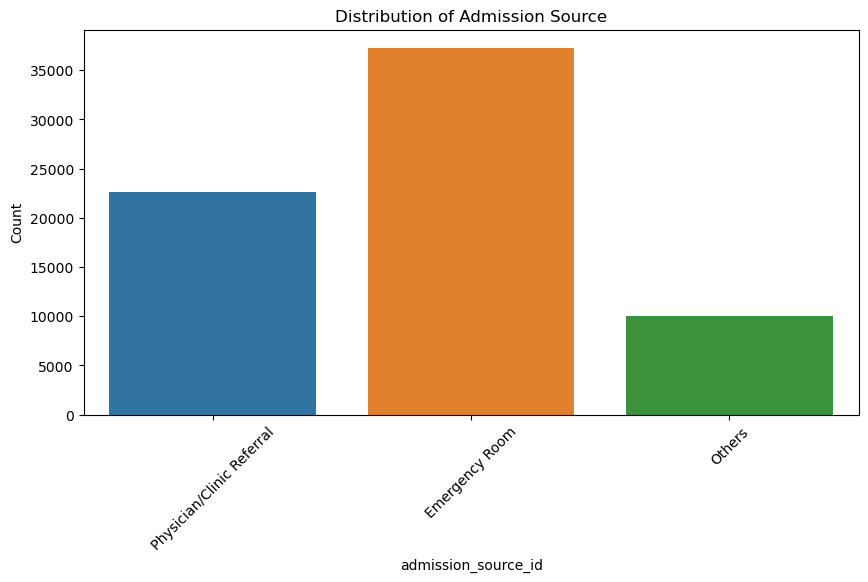

In [361]:
import seaborn as sns
import matplotlib.pyplot as plt

variable = "admission_source_id"  # Replace with the column name

plt.figure(figsize=(10, 5))
sns.countplot(x=df2[variable])
plt.title(f"Distribution of Admission Source")
plt.xlabel(variable)
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate labels for better readability if needed
plt.show()


In [35]:
df3 = df2.copy()

In [36]:
df3.shape

(69960, 43)

In [37]:
df3['diag_1'].nunique()

694

df3['diag_1'].unique()

In [38]:
# Grouping "diag_1" into categories and renaming it to primary diagnosis

# Function to categorize diag_1
def categorize_diag(code):
    try:
        code = int(code)  # Convert to integer
        if (390 <= code <= 459) or code == 785:
            return "Circulatory"
        elif (460 <= code <= 519) or code == 786:
            return "Respiratory"
        elif (520 <= code <= 579) or code == 787:
            return "Digestive"
        elif code == 250:
            return "Diabetes"
        elif 800 <= code <= 999:
            return "Injury"
        elif 710 <= code <= 739:
            return "Musculoskeletal"
        elif (580 <= code <= 629) or code == 788:
            return "Genitourinary"
        elif 140 <= code <= 239:
            return "Neoplasms"
        elif code in [780, 781, 784, 790, 799]:
            return "Neoplasms"
        else:
            return "Others"
    except ValueError:
        return "Others"  # Handles non-numeric values

# Apply the function to the "diag_1" column
df3["primary_diagnosis"] = df3["diag_1"].apply(categorize_diag)


In [39]:
df3['primary_diagnosis'].unique()

array(['Circulatory', 'Musculoskeletal', 'Injury', 'Others',
       'Genitourinary', 'Respiratory', 'Digestive', 'Neoplasms',
       'Diabetes'], dtype=object)

In [40]:
df3.drop(columns=["diag_1"], inplace=True)

In [41]:
df3.shape

(69960, 43)

In [42]:
# Regroup 'age' variable

# Define the age group mapping
age_mapping = {
    "[0-10)": 5,
    "[10-20)": 15,
    "[20-30)": 25,
    "[30-40)": 35,
    "[40-50)": 45,
    "[50-60)": 55,
    "[60-70)": 65,
    "[70-80)": 75,
    "[80-90)": 85,
    "[90-100)": 95
}

# Apply the mapping
df3["age"] = df3["age"].map(age_mapping)


In [43]:
df3['age'].unique()


array([55, 85, 35, 65, 45, 75, 15, 95, 25,  5])

In [55]:
df3['medical_specialty'].unique()

array(['Cardiology', 'Other', 'InternalMedicine', 'UnKnown',
       'Surgery-General', 'Emergency/Trauma', 'Family/GeneralPractice'],
      dtype=object)

In [105]:
df3['medical_specialty'].value_counts().head(10)

medical_specialty
UnKnown                       33634
InternalMedicine              10640
Family/GeneralPractice         4978
Emergency/Trauma               4392
Cardiology                     4206
Surgery-General                2205
Orthopedics                    1128
Orthopedics-Reconstructive     1041
Radiologist                     821
Nephrology                      797
Name: count, dtype: int64

In [54]:
# Get value counts
value_counts = df3['medical_specialty'].value_counts(normalize=False)
value_percent = df3['medical_specialty'].value_counts(normalize=True) * 100  # As percentage

# Combine both into a DataFrame
top_10 = pd.DataFrame({
    'count': value_counts,
    'percentage': value_percent
}).head(10)

# Reset index and rename for clarity
top_10 = top_10.reset_index().rename(columns={'index': 'medical_specialty'})

print(top_10)


        medical_specialty  count  percentage
0                 UnKnown  33634   48.076043
1        InternalMedicine  10640   15.208691
2                   Other   9905   14.158090
3  Family/GeneralPractice   4978    7.115495
4        Emergency/Trauma   4392    6.277873
5              Cardiology   4206    6.012007
6         Surgery-General   2205    3.151801


In [45]:
# Categorizing "medical_specialty"

# Get the top 6 most frequent categories
top_6_specialties = df3['medical_specialty'].value_counts().head(6).index.tolist()

# Create a new column with "Other" for everything not in the top 6
df3['medical_specialty'] = df3['medical_specialty'].apply(
    lambda x: x if x in top_6_specialties else "Other"
)

# Check the grouped distribution
grouped_counts = df3['medical_specialty'].value_counts(normalize=True) * 100
print(grouped_counts)


medical_specialty
UnKnown                   48.076043
InternalMedicine          15.208691
Other                     14.158090
Family/GeneralPractice     7.115495
Emergency/Trauma           6.277873
Cardiology                 6.012007
Surgery-General            3.151801
Name: proportion, dtype: float64


In [46]:
df3['A1Cresult'].unique()

array(['None', '>7', '>8', 'Norm'], dtype=object)

In [47]:
conditions = [
    df3["A1Cresult"].isin([">7", ">8"]),
    df3["A1Cresult"] == "Norm",
    df3["A1Cresult"] == "None"
]

choices = ["High", "Normal", "No_Test"]

df3["A1Cresult"] = np.select(conditions, choices, default="Other")


In [48]:
df3['A1Cresult'].unique()

array(['No_Test', 'High', 'Normal'], dtype=object)

In [49]:
df3['max_glu_serum'].unique()

array(['None', 'Norm', '>300', '>200'], dtype=object)

In [50]:
conditions = [
    df3["max_glu_serum"].isin([">200", ">300"]),
    df3["max_glu_serum"] == "Norm",
    df3["max_glu_serum"] == "None"
]

choices = ["High", "Normal", "No_Test"]

df3["max_glu_serum"] = np.select(conditions, choices, default="Other")


In [51]:
df3['max_glu_serum'].unique()

array(['No_Test', 'Normal', 'High'], dtype=object)

In [52]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69960 entries, 4267 to 96147
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              69960 non-null  int64 
 1   race                      69960 non-null  object
 2   gender                    69960 non-null  object
 3   age                       69960 non-null  int64 
 4   admission_type_id         69960 non-null  object
 5   discharge_disposition_id  69960 non-null  object
 6   admission_source_id       69960 non-null  object
 7   time_in_hospital          69960 non-null  int64 
 8   payer_code                69960 non-null  object
 9   medical_specialty         69960 non-null  object
 10  num_lab_procedures        69960 non-null  int64 
 11  num_procedures            69960 non-null  int64 
 12  num_medications           69960 non-null  int64 
 13  number_outpatient         69960 non-null  int64 
 14  number_emergency        

In [53]:
df3.head(20).T

,4267,5827,67608,17494,2270,1164,18234,15848,61382,2279,7866,25911,1083,2001,11049,2484,17342,15980,4407,7038
encounter_id,24437208,29758806,189899286,64331490,14824206,8380170,66197028,60254142,171414378,14897280,36469686,85907514,7981038,12979032,46158792,16202982,63956982,60553632,24919512,33994464
race,Caucasian,Caucasian,Caucasian,Caucasian,AfricanAmerican,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,AfricanAmerican,AfricanAmerican,Caucasian
gender,Female,Female,Female,Female,Female,Female,Female,Female,Male,Female,Male,Female,Male,Male,Female,Female,Male,Male,Female,Male
age,55,55,85,85,35,55,65,45,75,75,65,75,65,75,85,65,45,85,65,75
admission_type_id,Emergency,Elective,Emergency,Emergency,Emergency,Emergency,Elective,Emergency,Elective,Emergency,Emergency,Elective,Emergency,Elective,Emergency,Emergency,Emergency,Emergency,Elective,Elective
discharge_disposition_id,Home,Home,Others,Home,Home,Home,Home,Home,Home,Others,Home,Home,Home,Others,Others,Home,Home,Home,Others,Home
admission_source_id,Physician/Clinic Referral,Physician/Clinic Referral,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Physician/Clinic Referral,Physician/Clinic Referral,Others,Physician/Clinic Referral,Physician/Clinic Referral,Physician/Clinic Referral,Emergency Room,Physician/Clinic Referral,Emergency Room,Emergency Room,Emergency Room,Emergency Room,Physician/Clinic Referral,Physician/Clinic Referral
time_in_hospital,8,2,4,3,5,6,9,2,14,12,8,1,2,7,7,4,1,1,4,6
payer_code,UnKnown,UnKnown,MC,UnKnown,UnKnown,UnKnown,UnKnown,UnKnown,MC,UnKnown,UnKnown,UnKnown,UnKnown,UnKnown,UnKnown,UnKnown,UnKnown,UnKnown,UnKnown,UnKnown
medical_specialty,Cardiology,Other,InternalMedicine,InternalMedicine,InternalMedicine,Other,InternalMedicine,InternalMedicine,UnKnown,InternalMedicine,Cardiology,Other,InternalMedicine,Cardiology,InternalMedicine,Surgery-General,InternalMedicine,Emergency/Trauma,Other,Other


## Data is cleaned.

In [56]:
df3.to_csv("Diabetes_Clean.csv", index=False)

In [71]:
df3.head().T

,4267,5827,67608,17494,2270
encounter_id,24437208,29758806,189899286,64331490,14824206
race,Caucasian,Caucasian,Caucasian,Caucasian,AfricanAmerican
gender,Female,Female,Female,Female,Female
age,55,55,85,85,35
admission_type_id,Emergency,Elective,Emergency,Emergency,Emergency
discharge_disposition_id,Home,Home,Others,Home,Home
admission_source_id,Physician/Clinic Referral,Physician/Clinic Referral,Emergency Room,Emergency Room,Emergency Room
time_in_hospital,8,2,4,3,5
payer_code,UnKnown,UnKnown,MC,UnKnown,UnKnown
medical_specialty,Cardiology,Other,InternalMedicine,InternalMedicine,InternalMedicine


In [57]:
#Numerical Columns in dataset

df_num_cols=df3[['age','time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']]
df_num_cols.isnull().sum()

age                   0
time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
number_diagnoses      0
dtype: int64

In [58]:
#Categorical Columns in dataset
categorical_columns=['race', 'gender', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'payer_code','max_glu_serum', 'A1Cresult', 'metformin', 
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'primary_diagnosis']

In [59]:
df_num_cols.columns

Index(['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

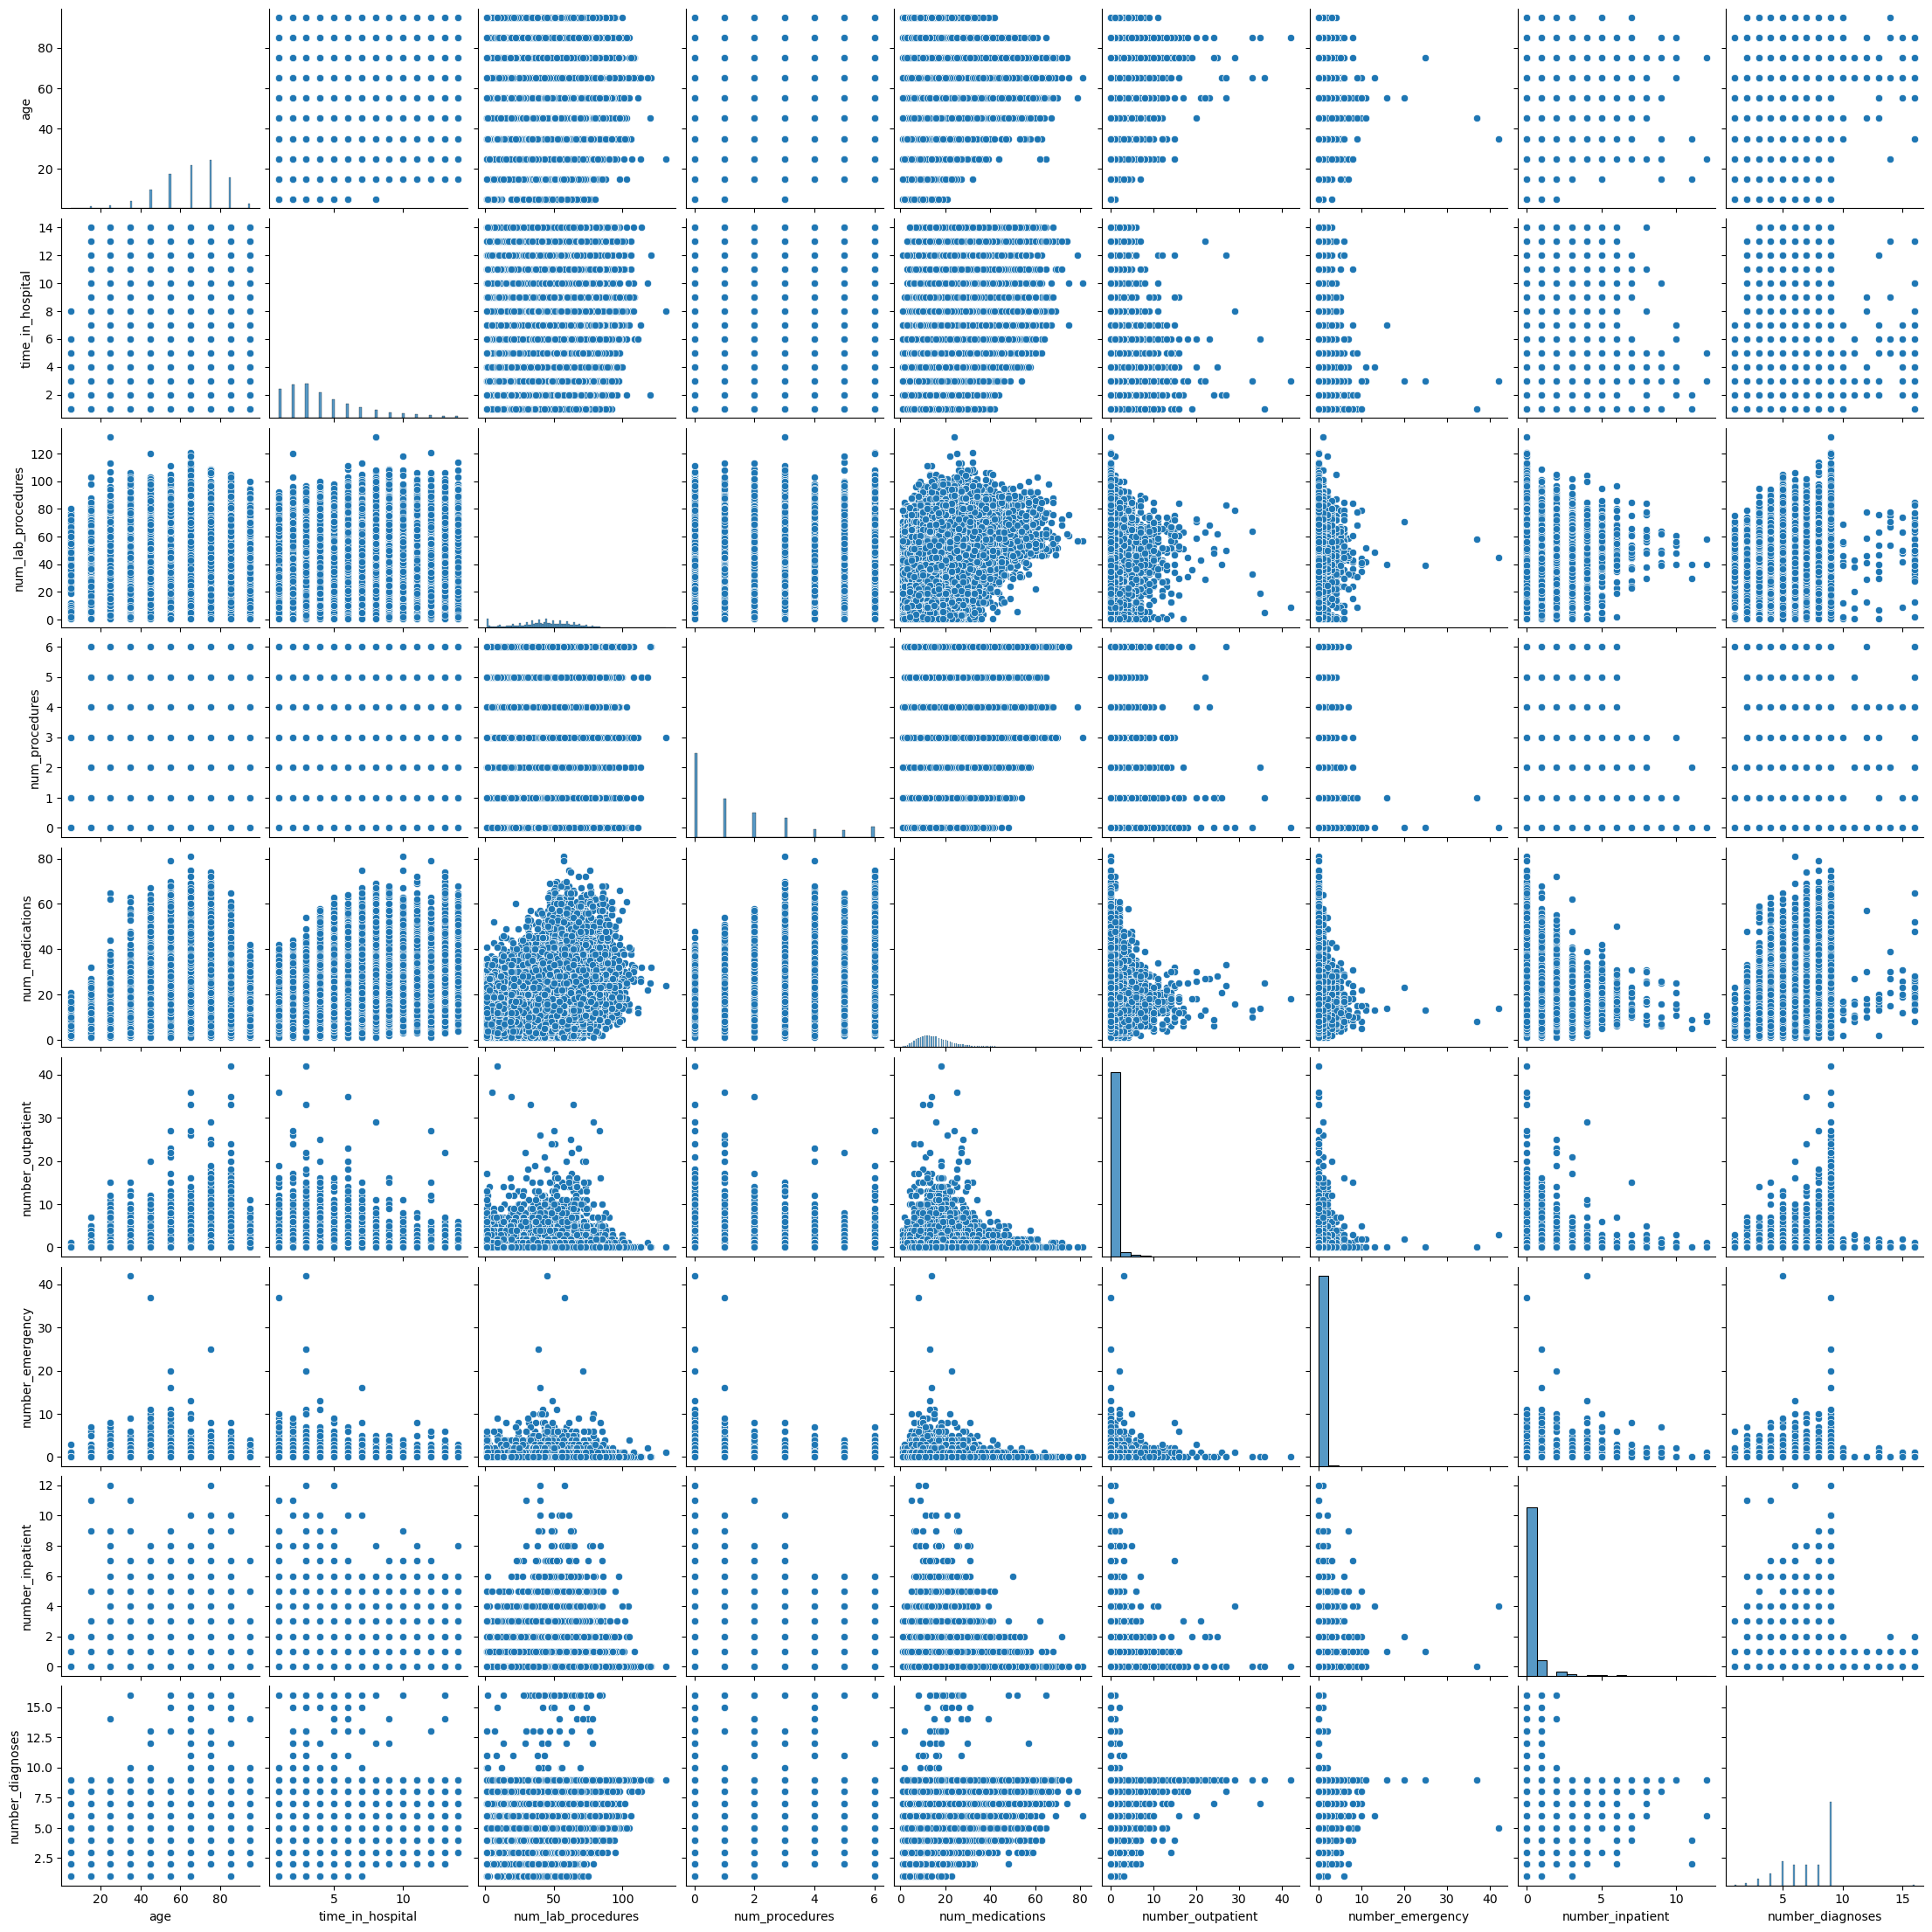

In [120]:
import seaborn as sns
sns.pairplot(df_num_cols)


## Correlation Analysis

In [121]:
# Correlation Heatmap

correlation_matrix = df_num_cols.corr(numeric_only=True)  # Get correlations between numeric columns
print(correlation_matrix)

                         age  time_in_hospital  num_lab_procedures  \
age                 1.000000          0.127432            0.025156   
time_in_hospital    0.127432          1.000000            0.332131   
num_lab_procedures  0.025156          0.332131            1.000000   
num_procedures     -0.022671          0.188349            0.043854   
num_medications     0.055527          0.467910            0.259010   
number_outpatient   0.026210         -0.015459           -0.008060   
number_emergency   -0.047609         -0.010052            0.015461   
number_inpatient    0.015496          0.063971            0.079775   
number_diagnoses    0.252735          0.233801            0.153938   

                    num_procedures  num_medications  number_outpatient  \
age                      -0.022671         0.055527           0.026210   
time_in_hospital          0.188349         0.467910          -0.015459   
num_lab_procedures        0.043854         0.259010          -0.008060   
num

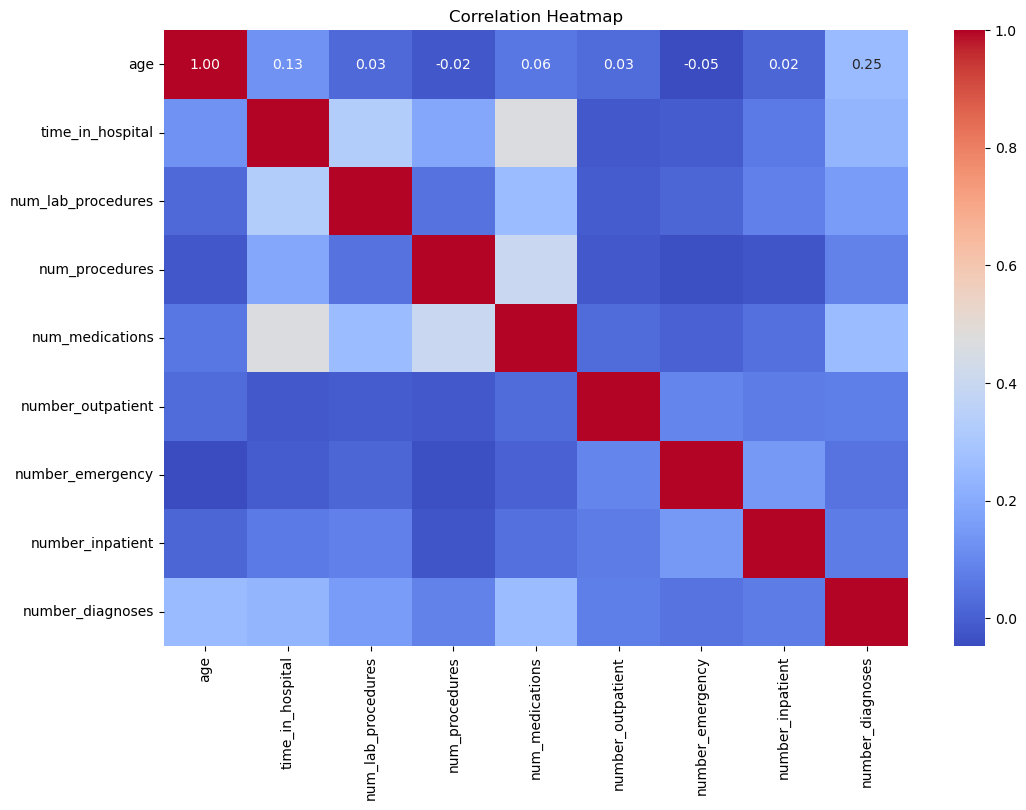

In [122]:
# Correlation Heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [72]:
df_clean=df3.copy()

In [73]:
cols_to_drop = ['metformin', 
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'payer_code']
df_clean = df_clean.drop(columns=cols_to_drop)


In [83]:
#Categorical Columns in dataset
categorical_columns=['race', 'gender', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'max_glu_serum', 'A1Cresult', 'change', 'diabetesMed', 'primary_diagnosis']

## One Hot Encoding

In [84]:
df_cat=pd.get_dummies(df_clean[categorical_columns],drop_first=True)

In [85]:
df_cat = df_cat.astype(int)
df_cat

,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_UnKnown,gender_Male,admission_type_id_Emergency,admission_type_id_Newborn,admission_type_id_Others,discharge_disposition_id_Others,...,change_No,diabetesMed_Yes,primary_diagnosis_Diabetes,primary_diagnosis_Digestive,primary_diagnosis_Genitourinary,primary_diagnosis_Injury,primary_diagnosis_Musculoskeletal,primary_diagnosis_Neoplasms,primary_diagnosis_Others,primary_diagnosis_Respiratory
4267,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5827,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
67608,0,1,0,0,0,0,1,0,0,1,...,1,1,0,0,0,1,0,0,0,0
17494,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2270,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99863,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
95282,0,0,0,1,0,1,1,0,0,0,...,1,1,0,0,1,0,0,0,0,0
93651,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
101748,0,1,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [86]:
df_num_cols

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
4267,55,8,77,6,33,0,0,0,8
5827,55,2,49,1,11,0,0,0,3
67608,85,4,68,2,23,0,0,0,9
17494,85,3,46,0,20,0,0,0,9
2270,35,5,49,0,5,0,0,0,3
...,...,...,...,...,...,...,...,...,...
99863,85,1,73,1,11,0,0,0,9
95282,65,3,56,1,8,0,0,0,7
93651,85,3,39,0,18,0,0,0,9
101748,45,14,69,0,16,0,0,0,5


In [87]:
# df4 has all the independent variable.

df4 = pd.concat([df_cat, df_num_cols], axis = 1)

In [88]:
# df5 has all the independent variable + the target variable.

df5 = pd.concat([df4, df3['readmitted']], axis = 1)

In [89]:
df5.to_csv("Diabetes_Num.csv", index=False)

In [66]:
# Correlation of all the independent variable with the target variable.

cor_with_target = df5.corr(numeric_only=True)["readmitted"].sort_values(ascending=False)
print(cor_with_target)


readmitted                         1.000000
number_inpatient                   0.100284
discharge_disposition_id_Others    0.098633
time_in_hospital                   0.056072
age                                0.047038
                                     ...   
change_No                         -0.014687
payer_code_CP                     -0.014859
payer_code_HM                     -0.017342
primary_diagnosis_Respiratory     -0.023355
insulin_No                        -0.023628
Name: readmitted, Length: 98, dtype: float64


In [131]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69960 entries, 4267 to 96147
Data columns (total 98 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   race_Asian                                     69960 non-null  int64
 1   race_Caucasian                                 69960 non-null  int64
 2   race_Hispanic                                  69960 non-null  int64
 3   race_Other                                     69960 non-null  int64
 4   race_UnKnown                                   69960 non-null  int64
 5   gender_Male                                    69960 non-null  int64
 6   admission_type_id_Emergency                    69960 non-null  int64
 7   admission_type_id_Newborn                      69960 non-null  int64
 8   admission_type_id_Others                       69960 non-null  int64
 9   discharge_disposition_id_Others                69960 non-null  int64
 10  

In [68]:
correlation_matrix = df5.corr(numeric_only=True)  # Get correlations between numeric columns
print(correlation_matrix)

                   race_Asian  race_Caucasian  race_Hispanic  race_Other  \
race_Asian           1.000000       -0.144172      -0.012398   -0.010830   
race_Caucasian      -0.144172        1.000000      -0.254452   -0.222283   
race_Hispanic       -0.012398       -0.254452       1.000000   -0.019114   
race_Other          -0.010830       -0.222283      -0.019114    1.000000   
race_UnKnown        -0.014060       -0.288576      -0.024815   -0.021678   
...                       ...             ...            ...         ...   
number_outpatient   -0.010400        0.059160      -0.007778   -0.010066   
number_emergency    -0.006278       -0.015018       0.005658   -0.002944   
number_inpatient    -0.002286        0.027090       0.009518   -0.010376   
number_diagnoses    -0.014696        0.107557      -0.038504   -0.015579   
readmitted          -0.001665        0.012778      -0.004963   -0.009469   

                   race_UnKnown  gender_Male  admission_type_id_Emergency  \
race_Asian

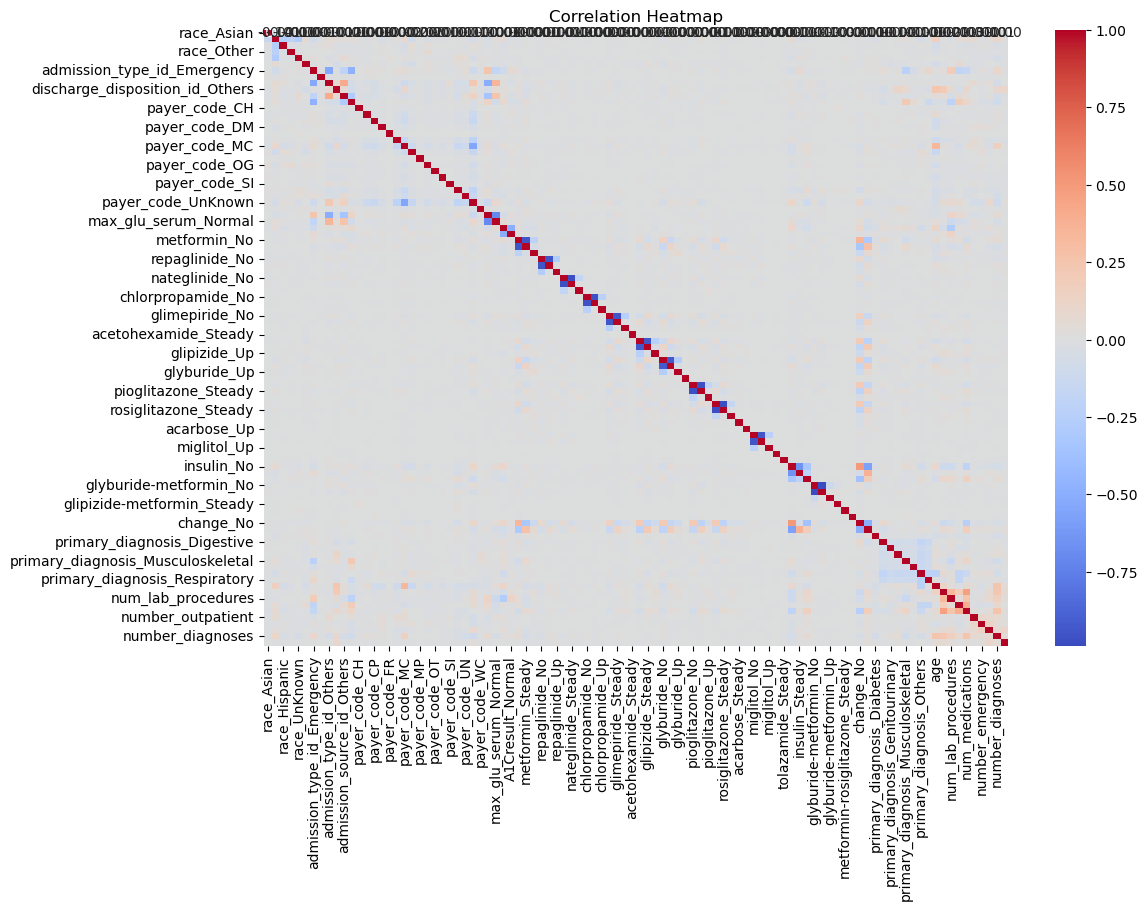

In [69]:
# Correlation Heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [70]:
# Identify Highly Correlated Variable Pairs (Corr>0.5)

corr_pairs = correlation_matrix.unstack()

corr_df = corr_pairs.reset_index()
corr_df.columns = ['Variable1', 'Variable2', 'Correlation']

corr_df = corr_df[corr_df['Variable1'] != corr_df['Variable2']]

corr_df['abs_corr'] = corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by='abs_corr', ascending=False)

corr_df['pairs'] = corr_df.apply(lambda row: tuple(sorted([row['Variable1'], row['Variable2']])), axis=1)
corr_df = corr_df.drop_duplicates(subset='pairs')

high_corr_df = corr_df[corr_df['abs_corr'] > 0.5][['Variable1', 'Variable2', 'Correlation']]

print(high_corr_df)

                       Variable1                    Variable2  Correlation
7226  glyburide-metformin_Steady       glyburide-metformin_No    -0.988771
5939        rosiglitazone_Steady             rosiglitazone_No    -0.976094
3862              nateglinide_No           nateglinide_Steady    -0.975085
5545             pioglitazone_No          pioglitazone_Steady    -0.973128
4256       chlorpropamide_Steady            chlorpropamide_No    -0.964111
6434             miglitol_Steady                  miglitol_No    -0.948670
4456              glimepiride_No           glimepiride_Steady    -0.946586
3365            metformin_Steady                 metformin_No    -0.945631
3565              repaglinide_No           repaglinide_Steady    -0.943802
4949            glipizide_Steady                 glipizide_No    -0.938892
5246            glyburide_Steady                 glyburide_No    -0.923706
2872       max_glu_serum_No_Test         max_glu_serum_Normal    -0.703922
6832                  ins

## Variable Clustering

Variable Clustering is done to reduce correlation and reduce the dimension of the data - Variable Selection.

In [137]:
# !pip install varclushi

In [136]:
from varclushi import VarClusHi
from sklearn.preprocessing import StandardScaler

# Apply Standardization
scaler = StandardScaler()
df_features = pd.DataFrame(scaler.fit_transform(df4), columns=df4.columns)

In [138]:
df_vc = VarClusHi(df_features)
df_vc.varclus()

In [139]:
df_vc.info

,Cluster,N_Vars,Eigval1,Eigval2,VarProp
0,0,3,2.074877,0.631372,0.691626
1,1,3,1.704175,0.999748,0.568058
2,2,3,1.946638,0.998993,0.648879
3,3,2,1.946586,0.053414,0.973293
4,4,2,1.988771,0.011229,0.994385
5,5,2,1.975085,0.024915,0.987543
6,6,2,1.964111,0.035889,0.982056
7,7,4,1.424908,0.986278,0.356227
8,8,2,1.943802,0.056198,0.971901
9,9,2,1.973128,0.026872,0.986564


In [140]:
df_vc.rsquare

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,insulin_No,0.819473,0.240065,0.237556
1,0,insulin_Steady,0.669051,0.008865,0.333909
2,0,diabetesMed_Yes,0.586353,0.178710,0.503655
3,1,max_glu_serum_No_Test,0.851781,0.231583,0.192888
4,1,max_glu_serum_Normal,0.851783,0.119255,0.168286
...,...,...,...,...,...
92,50,tolazamide_Steady,1.000000,0.000157,0.000000
93,51,metformin-rosiglitazone_Steady,1.000000,0.001016,0.000000
94,52,glyburide-metformin_Up,1.000000,0.003474,0.000000
95,53,miglitol_Up,1.000000,0.012819,0.000000


In [141]:
# Save VarClusHi .square results
df_vc.rsquare.to_csv("varclushi_square.csv", index=False)

In [145]:
# Sort features by RS_Ratio (higher is better)
df_rsquare_sorted = df_vc.rsquare.sort_values(by=["Cluster", "RS_Ratio"], ascending=[True, False])

In [146]:
# Select the best feature per cluster (highest RS_Own)
best_features = df_rsquare_sorted.groupby("Cluster").first()["Variable"].tolist()

In [157]:
len(best_features)

55

In [159]:
df_varclus = df5[best_features + ['readmitted']]

In [160]:
correlation_matrix = df_varclus.corr(numeric_only=True)  # Get correlations between numeric columns
print(correlation_matrix)

                                               diabetesMed_Yes  \
diabetesMed_Yes                                       1.000000   
tolbutamide_Steady                                    0.008722   
payer_code_WC                                         0.005657   
glimepiride_No                                       -0.132127   
glyburide-metformin_No                               -0.047274   
nateglinide_No                                       -0.047034   
chlorpropamide_No                                    -0.017832   
payer_code_UN                                         0.011733   
repaglinide_No                                       -0.064475   
pioglitazone_No                                      -0.159533   
miglitol_No                                          -0.009461   
rosiglitazone_No                                     -0.149400   
glipizide_No                                         -0.215031   
glyburide_No                                         -0.197807   
race_Asian

In [161]:
corr_pairs = correlation_matrix.unstack()

corr_df = corr_pairs.reset_index()
corr_df.columns = ['Variable1', 'Variable2', 'Correlation']

corr_df = corr_df[corr_df['Variable1'] != corr_df['Variable2']]

corr_df['abs_corr'] = corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by='abs_corr', ascending=False)

corr_df['pairs'] = corr_df.apply(lambda row: tuple(sorted([row['Variable1'], row['Variable2']])), axis=1)
corr_df = corr_df.drop_duplicates(subset='pairs')

high_corr_df = corr_df[corr_df['abs_corr'] > 0.5][['Variable1', 'Variable2', 'Correlation']]

print(high_corr_df)

Empty DataFrame
Columns: [Variable1, Variable2, Correlation]
Index: []


In [ ]:
Variable Clustering reduced our independent variables from 97 to 55 and also eliminated high correlation.

In [162]:
# Save VarClusHi .square results
df_varclus.to_csv("Diabetes_Selected_Features.csv", index=False)

Right now, we have two dataset to work with: df5 with all independent variables (97) + 1 target variable and df_varclus with selected variables through clustering (55) + 1 target variable. 

df5 is saved to Diabetes_Num.csv
df_varclus is saved to Diabetes_Selected_Features.csv